In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
Age_median = df.Age.median()

In [7]:
df.shape

(891, 12)

In [8]:
df1 = df.drop(columns=['Cabin','Name','Ticket','Fare'])
df1['Age'].fillna(Age_median,inplace=True)
df1.dropna(axis=0,inplace=True)
df1.shape

(889, 8)

In [9]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
col_transform =['Sex','Embarked']
le = LabelEncoder()
for i in col_transform:
    df1[i] = le.fit_transform(df1[i])
df1.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2


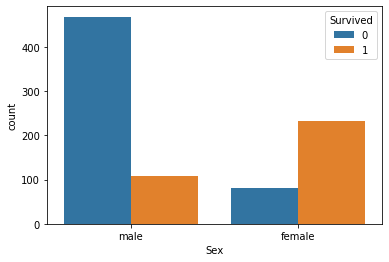

In [11]:
sns.countplot(x='Sex',hue='Survived',data=df)

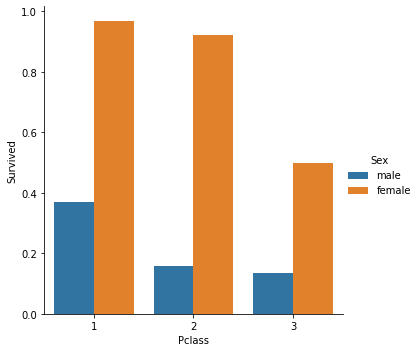

In [12]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='bar',ci=False)

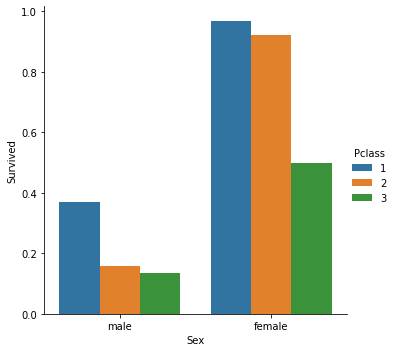

In [13]:
sns.catplot(x='Sex',y='Survived',hue='Pclass',data=df,kind='bar',ci=False)

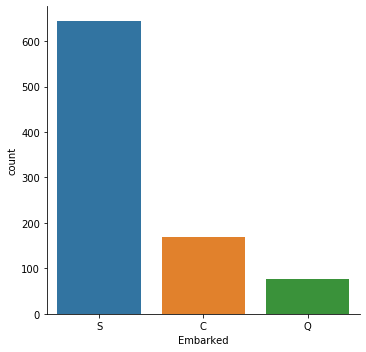

In [14]:
sns.catplot(x='Embarked',data=df,kind='count')

In [15]:
X=df1.drop(columns=['Survived'])
y=df1['Survived']

In [24]:
from sklearn.linear_model import Lasso,LogisticRegression,LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
def find_best_model_usingGrdSearchcv(X,y):
    algos={
      'RandomForestClassifier':{
            'model':RandomForestClassifier(),
             'params':{
                 'criterion':['gini','entropy'],
                 'random_state':[42],
                 'min_samples_leaf':[10,20,30]
             }
        },
        'LogisticRegression':{
            'model':LogisticRegression(),
             'params':{
                 'C':[100,200,300,400,500]
             }
        },
        'DecisionTree':{
            'model':DecisionTreeRegressor(),
             'params':{
                 'criterion':['mse','friedman_mse'],
                 'splitter':['best','random']
                
             }    
        },
        'AdaBoost_Classifier':{
            'model':AdaBoostClassifier(),
             'params':{
                 'n_estimators':[100,200,300],
                 'learning_rate':[0.5,0.005,1.0]
             }
            
        },
        'GradientBoostingClassifier':{
            'model':GradientBoostingClassifier(),
             'params':{
                 'n_estimators':[100,200,300],
                 'learning_rate':[0.5,0.005,1.0],
                 'min_samples_split':[5,10,20,30],
                 'min_samples_leaf':[10,20,30,40]
             }
            
        },
         'KNeighborsClassifier':{
            'model':KNeighborsClassifier(),
             'params':{
                 'n_neighbors':[10,20,30],
             }
            
        },
        
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        print(algo_name)
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
        'model':algo_name,
        'best_Score':gs.best_score_,
        'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_Score','best_params'])

In [17]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
linear_score = cross_val_score(LogisticRegression(),X,y,cv=cv)
print('LogisticRegression: ' , np.mean(linear_score))
svc_score = cross_val_score(svm.SVC(kernel='rbf',gamma=0.3,C=1),X,y,cv=cv)
print('SVC: ' , np.mean(svc_score))

from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier(n_neighbors = 10)
kn_score = cross_val_score(model_kn,X,y,cv=cv)
print('KN: ' , np.mean(kn_score))

from sklearn.ensemble import GradientBoostingClassifier
model_GB= GradientBoostingClassifier(n_estimators=30,random_state=50,min_samples_split=50,min_samples_leaf=40)
kn_score = cross_val_score(model_GB,X,y,cv=cv)
print('GB: ' , np.mean(kn_score))

LogisticRegression:  0.7910112359550562
SVC:  0.6202247191011236
KN:  0.5808988764044944
GB:  0.8191011235955056


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
find_best_model_usingGrdSearchcv(X_train,y_train)

RandomForestClassifier
LogisticRegression
DecisionTree
AdaBoost_Classifier
GradientBoostingClassifier
KNeighborsClassifier


,model,best_Score,best_params
0,RandomForestClassifier,0.796639,"{'criterion': 'gini', 'min_samples_leaf': 10, ..."
1,LogisticRegression,0.778151,{'C': 100}
2,DecisionTree,0.016516,"{'criterion': 'mse', 'splitter': 'random'}"
3,AdaBoost_Classifier,0.784874,"{'learning_rate': 0.5, 'n_estimators': 100}"
4,GradientBoostingClassifier,0.815126,"{'learning_rate': 0.005, 'min_samples_leaf': 1..."
5,KNeighborsClassifier,0.578151,{'n_neighbors': 100}


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
model_GB= GradientBoostingClassifier(n_estimators=30,random_state=50,min_samples_split=50,min_samples_leaf=40)
model_GB.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=50,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='auto',
                           random_state=50, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score

In [30]:
predict = model_GB.predict(X_test)
confusion_matrix(y_test, predict)

array([[165,  19],
       [ 34,  76]], dtype=int64)

In [31]:
accuracy_score(y_test, predict)

0.8197278911564626

In [32]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       184
           1       0.80      0.69      0.74       110

    accuracy                           0.82       294
   macro avg       0.81      0.79      0.80       294
weighted avg       0.82      0.82      0.82       294

